# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV705"

In [3]:
# LV_AXIS_THRESHOLD = None  # 3.0
LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
OUTPUT_FIGURES_DIR = Path(
    conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
).resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv705')

In [5]:
OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
display(OUTPUT_CELL_TYPE_FILEPATH)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv705/lv705-cell_types.svg')

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
1669,SVM NK cells activated,705,0.852081,1.669993e-07,0.000004
1670,PID_IL12_2PATHWAY,705,0.711270,2.429515e-03,0.015278


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP060416, SRP053186, SRP051736, SRP049462, SRP066834, SRP042161, SRP061932, SRP055474, SRP037735, SRP059057, SRP057745, SRP050499, SRP055569, SRP029603, SRP007881, SRP045570, SRP064464, SRP039591, SRP019207, SRP043339, SRP067173, SRP055675, SRP065988, SRP059735, SRP059172, SRP057196, SRP024244, SRP041255, SRP049648, SRP033135, SRP061881, SRP063840, SRP051765, SRP029656, SRP048604, SRP059379, SRP010961, SRP059039, SRP014428, 

In [18]:
lv_data.shape

(5125, 76)

In [19]:
lv_data.head()

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088096    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088128    Donor T74        ILC3  tonsil Innate lymphoid cells   
          SRR2088153    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088179    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   

                     culture condition genotype lab data id tissue activation  \
project   run                                                                   
SRP060416 SRR2088096               NaN      NaN         NaN    NaN        NaN   
          SRR2088128               NaN      NaN         NaN    NaN        NaN   
          SRR2088153               NaN      NaN         NaN    NaN        NaN   
          SRR2088179               NaN      NaN         NaN    NaN        NaN   
          SRR2088205               NaN      NaN         NaN    NaN        NaN   

                     passages bardcode  ... iPSc reprogramming vector time  \
project   run                           ...                                  
SRP060416 SRR2088096      NaN      NaN  ...  NaN                  NaN  NaN   
          SRR2088128      NaN      NaN  ...  NaN                  NaN  NaN   
          SRR2088153      NaN      NaN  ...  NaN                  NaN  NaN   
          SRR2088179      NaN      NaN  ...  NaN                  NaN  NaN   
          SRR2088205      NaN      NaN  ...  NaN                  NaN  NaN   

                     rna subtype activation status organisms severity  \
project   run                                                           
SRP060416 SRR2088096         NaN               NaN       NaN      NaN   
          SRR2088128         NaN               NaN       NaN      NaN   
          SRR2088153         NaN               NaN       NaN      NaN   
          SRR2088179         NaN               NaN       NaN      NaN   
          SRR2088205         NaN               NaN       NaN      NaN   

                     flowcell lane     LV705  
project   run                                 
SRP060416 SRR2088096      NaN  NaN  0.002031  
          SRR2088128      NaN  NaN -0.008827  
          SRR2088153      NaN  NaN -0.073578  
          SRR2088179      NaN  NaN -0.014267  
          SRR2088205      NaN  NaN -0.020977  

[5 rows x 76 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tonsil donor             0.080636
facs gating              0.080636
cell sorted              0.043895
time in culture          0.043895
passages                 0.024743
activation               0.024743
bardcode                 0.024743
genotype                 0.022975
culture condition        0.022975
cell type                0.018666
lab data id              0.018369
antibody                 0.012110
differentiation stage    0.012110
fragmentsize             0.008227
metastatic site          0.008227
disease state            0.008220
tumor stage              0.008220
cell stimulation         0.007982
phenotype                0.007982
cancer subtype           0.005709
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type       0.018666
cell subtype    0.003621
tissue          0.003265
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "cell subtype",
        "tissue",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type cell subtype  \
project   run                                                     
SRP060416 SRR2088111  tonsil Innate lymphoid cells          NaN   
          SRR2088085  tonsil Innate lymphoid cells          NaN   
          SRR2088076  tonsil Innate lymphoid cells          NaN   
          SRR2088228  tonsil Innate lymphoid cells          NaN   
          SRR2088124  tonsil Innate lymphoid cells          NaN   
          SRR2088245  tonsil Innate lymphoid cells          NaN   
          SRR2088109  tonsil Innate lymphoid cells          NaN   
          SRR2088095  tonsil Innate lymphoid cells          NaN   
          SRR2088296  tonsil Innate lymphoid cells          NaN   
          SRR2088364  tonsil Innate lymphoid cells          NaN   
          SRR2088108  tonsil Innate lymphoid cells          NaN   
          SRR2088222  tonsil Innate lymphoid cells          NaN   
SRP053186 SRR1786583                           NaN          NaN   
          SRR1786588                           NaN          NaN   
SRP060416 SRR2088386  tonsil Innate lymphoid cells          NaN   
SRP051736 SRR1743977    Pre-activated CD8+ T cells          NaN   
          SRR1743976    Pre-activated CD8+ T cells          NaN   
SRP060416 SRR2088468  tonsil Innate lymphoid cells          NaN   
          SRR2088114  tonsil Innate lymphoid cells          NaN   
          SRR2088117  tonsil Innate lymphoid cells          NaN   
SRP053186 SRR1786606                           NaN          NaN   
          SRR1786589                           NaN          NaN   
          SRR1786603                           NaN          NaN   
          SRR1786607                           NaN          NaN   
SRP060416 SRR2088145  tonsil Innate lymphoid cells          NaN   

                                tissue     LV705  
project   run                                     
SRP060416 SRR2088111               NaN  5.499851  
          SRR2088085               NaN  1.743952  
          SRR2088076               NaN  1.480040  
          SRR2088228               NaN  1.436855  
          SRR2088124               NaN  1.316738  
          SRR2088245               NaN  1.078827  
          SRR2088109               NaN  0.799216  
          SRR2088095               NaN  0.742607  
          SRR2088296               NaN  0.722566  
          SRR2088364               NaN  0.689980  
          SRR2088108               NaN  0.636089  
          SRR2088222               NaN  0.628672  
SRP053186 SRR1786583               NaN  0.579558  
          SRR1786588               NaN  0.567178  
SRP060416 SRR2088386               NaN  0.562002  
SRP051736 SRR1743977  Peripheral blood  0.551803  
          SRR1743976  Peripheral blood  0.532048  
SRP060416 SRR2088468               NaN  0.529612  
          SRR2088114               NaN  0.509574  
          SRR2088117               NaN  0.506314  
SRP053186 SRR1786606               NaN  0.501315  
          SRR1786589               NaN  0.497269  
          SRR1786603               NaN  0.492491  
          SRR1786607               NaN  0.480204  
SRP060416 SRR2088145               NaN  0.472315

In [25]:
# what is there in these projects?
lv_data.loc[["SRP060416"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088111    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088085    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088076    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088228    Donor T75          NK  tonsil Innate lymphoid cells   
          SRR2088124    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088245    Donor T75          NK  tonsil Innate lymphoid cells   
          SRR2088109    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088095    Donor T74        ILC2  tonsil Innate lymphoid cells   
          SRR2088296    Donor T75          NK  tonsil Innate lymphoid cells   
          SRR2088364    Donor T75        ILC1  tonsil Innate lymphoid cells   

                         LV705  
project   run                   
SRP060416 SRR2088111  5.499851  
          SRR2088085  1.743952  
          SRR2088076  1.480040  
          SRR2088228  1.436855  
          SRR2088124  1.316738  
          SRR2088245  1.078827  
          SRR2088109  0.799216  
          SRR2088095  0.742607  
          SRR2088296  0.722566  
          SRR2088364  0.689980

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

cell type     LV705
project   run                                               
SRP060416 SRR2088111  tonsil Innate lymphoid cells  5.499851
          SRR2088085  tonsil Innate lymphoid cells  1.743952
          SRR2088076  tonsil Innate lymphoid cells  1.480040
          SRR2088228  tonsil Innate lymphoid cells  1.436855
          SRR2088124  tonsil Innate lymphoid cells  1.316738
          SRR2088245  tonsil Innate lymphoid cells  1.078827
          SRR2088109  tonsil Innate lymphoid cells  0.799216
          SRR2088095  tonsil Innate lymphoid cells  0.742607
          SRR2088296  tonsil Innate lymphoid cells  0.722566
          SRR2088364  tonsil Innate lymphoid cells  0.689980
          SRR2088108  tonsil Innate lymphoid cells  0.636089
          SRR2088222  tonsil Innate lymphoid cells  0.628672
SRP053186 SRR1786583               NOT CATEGORIZED  0.579558
          SRR1786588               NOT CATEGORIZED  0.567178
SRP060416 SRR2088386  tonsil Innate lymphoid cells  0.562002
SRP051736 SRR1743977    Pre-activated CD8+ T cells  0.551803
          SRR1743976    Pre-activated CD8+ T cells  0.532048
SRP060416 SRR2088468  tonsil Innate lymphoid cells  0.529612
          SRR2088114  tonsil Innate lymphoid cells  0.509574
          SRR2088117  tonsil Innate lymphoid cells  0.506314

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
_srp_code = "SRP039591"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Hepatosplenic T-cell lymphoma",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [36]:
_srp_code = "SRP051736"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"{x[SELECTED_ATTRIBUTE]} (IL-2 stimulated)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
_srp_code = "SRP055474"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"T cells",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [38]:
_srp_code = "SRP065988"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"T cells ({lv_data.loc[(_srp_code, x.name), 'differentiation stage']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [39]:
_srp_code = "SRP045570"

_lv_data = lv_data.loc[(_srp_code,)]
_lv_data.loc["SRR1552955", "treatment"] = _lv_data.loc["SRR1552964", "treatment"]

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"CD4+CD45RA+CD45RO− T-cell ({_lv_data.loc[x.name, 'treatment']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_426/3633994665.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  _lv_data = lv_data.loc[(_srp_code,)]


In [40]:
_srp_code = "SRP010961"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"T cells ({lv_data.loc[(_srp_code, x.name), 'activation status']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [41]:
_srp_code = "SRP055675"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"{x[SELECTED_ATTRIBUTE]} ({'not-expanded nTregs' if lv_data.loc[(_srp_code, x.name), 'group'].startswith('A: ') else 'expanded nTregs'})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [42]:
_srp_code = "SRP043339"

def _replace_str(x):
    _replace = {
        "TFH": "Tfh",
        "TEFF": "Teff",
    }
    
    return _replace[x] if x in _replace else "NaN"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"{x[SELECTED_ATTRIBUTE]} ({_replace_str(lv_data.loc[(_srp_code, x.name), 't cell type'])})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [43]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [44]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [45]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [46]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [47]:
len(attr_order)

15

In [48]:
attr_order[:5]

['tonsil Innate lymphoid cells (NK)',
 'tonsil Innate lymphoid cells (ILC2)',
 'tonsil Innate lymphoid cells (ILC1)',
 'tonsil Innate lymphoid cells (ILC3)',
 'NOT CATEGORIZED']

## Plot

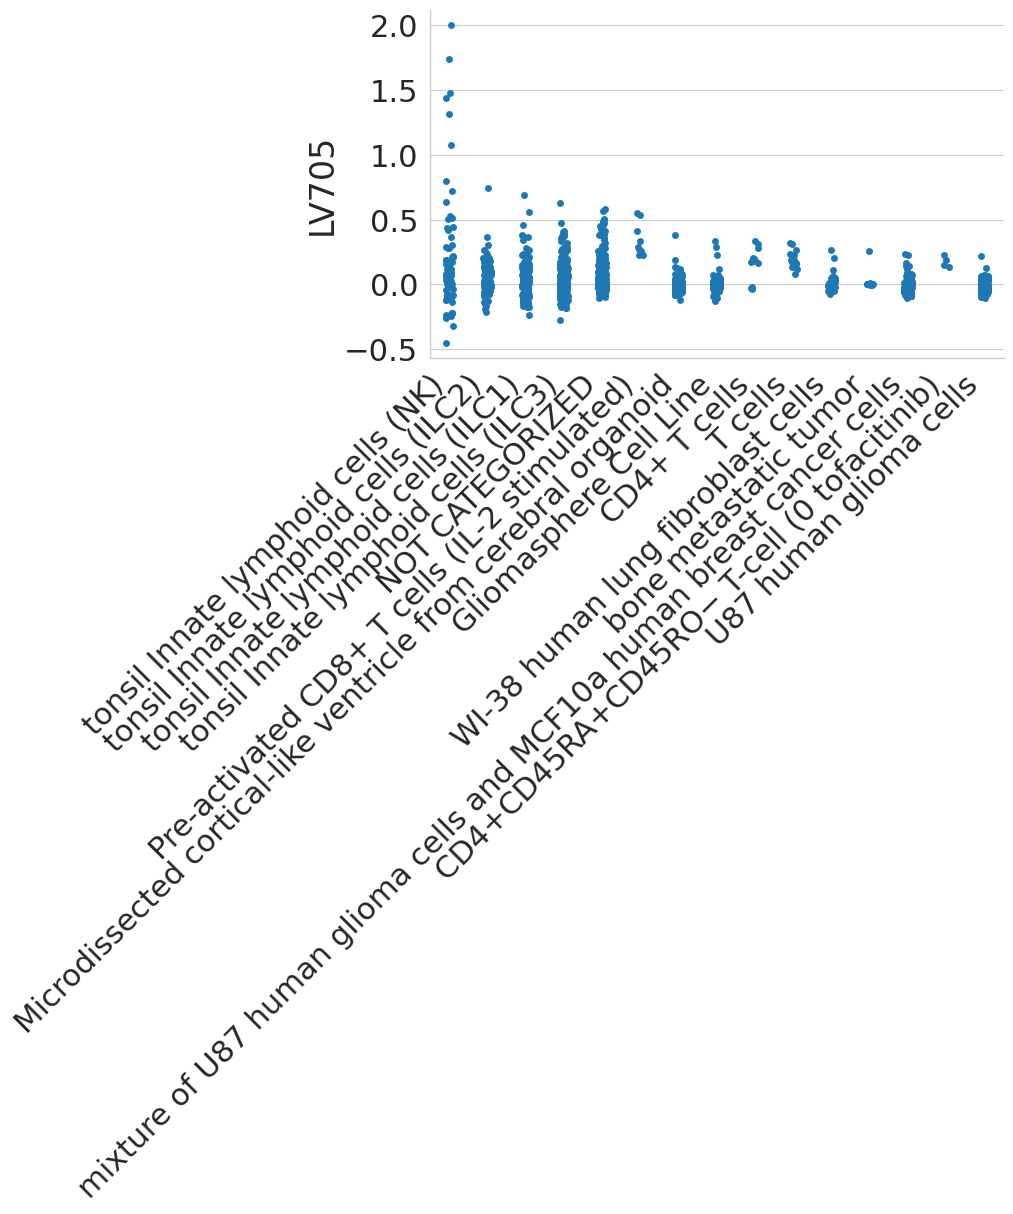

In [49]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [50]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [51]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^NOT CATEGORIZED$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV705
project   run                                  
SRP053186 SRR1786583  NOT CATEGORIZED  0.579558
          SRR1786588  NOT CATEGORIZED  0.567178
          SRR1786606  NOT CATEGORIZED  0.501315
          SRR1786589  NOT CATEGORIZED  0.497269
          SRR1786603  NOT CATEGORIZED  0.492491
          SRR1786607  NOT CATEGORIZED  0.480204
          SRR1786582  NOT CATEGORIZED  0.471791
SRP049462 SRR1638521  NOT CATEGORIZED  0.455748
SRP053186 SRR1786601  NOT CATEGORIZED  0.448598
          SRR1786597  NOT CATEGORIZED  0.424718
          SRR1786604  NOT CATEGORIZED  0.413813
          SRR1786587  NOT CATEGORIZED  0.398055
          SRR1786586  NOT CATEGORIZED  0.381013
SRP049462 SRR1638523  NOT CATEGORIZED  0.379281
SRP053186 SRR1786585  NOT CATEGORIZED  0.377730
          SRR1786600  NOT CATEGORIZED  0.359344
          SRR1786598  NOT CATEGORIZED  0.340156
          SRR1786595  NOT CATEGORIZED  0.316934
          SRR1786581  NOT CATEGORIZED  0.296051
          SRR1786596  NOT CATEGORIZED  0.283873

In [52]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP053186"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

culture condition  \
project   run                                                            
SRP053186 SRR1786583  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786588   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786606   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786589  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786603   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786607  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786582   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786601  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786597   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786604  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786587                    3 day in vitro culture for Th0   
          SRR1786586  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786585   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786600   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786598  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786595  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786581                    3 day in vitro culture for Th0   
          SRR1786596                    3 day in vitro culture for Th0   
          SRR1786599                    3 day in vitro culture for Th0   
          SRR1786592  3 day in vitro culture for Th0, treatment (IL27)   
          SRR1786594   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786591   3 day in vitro culture for Th0, treatment (IL6)   
          SRR1786605                    3 day in vitro culture for Th0   
          SRR1786602                    3 day in vitro culture for Th0   
          SRR1786584                    3 day in vitro culture for Th0   
          SRR1786590                    3 day in vitro culture for Th0   
          SRR1786593                    3 day in vitro culture for Th0   

                                 genotype lab data id     LV705  
project   run                                                    
SRP053186 SRR1786583    healthy control 1         695  0.579558  
          SRR1786588    healthy control 3         790  0.567178  
          SRR1786606  STAT1 GOF patient 5         845  0.501315  
          SRR1786589    healthy control 3         791  0.497269  
          SRR1786603  STAT1 GOF patient 4         842  0.492491  
          SRR1786607  STAT1 GOF patient 5         846  0.480204  
          SRR1786582    healthy control 1         694  0.471791  
          SRR1786601  STAT1 GOF patient 3         840  0.448598  
          SRR1786597  STAT1 GOF patient 2         796  0.424718  
          SRR1786604  STAT1 GOF patient 4         843  0.413813  
          SRR1786587    healthy control 3         789  0.398055  
          SRR1786586    healthy control 2         788  0.381013  
          SRR1786585    healthy control 2         787  0.377730  
          SRR1786600  STAT1 GOF patient 3         839  0.359344  
          SRR1786598  STAT1 GOF patient 2         797  0.340156  
          SRR1786595  STAT1 GOF patient 1         623  0.316934  
          SRR1786581    healthy control 1         693  0.296051  
          SRR1786596  STAT1 GOF patient 2         795  0.283873  
          SRR1786599  STAT1 GOF patient 3         838  0.259992  
          SRR1786592    healthy control 4         837  0.242667  
          SRR1786594  STAT1 GOF patient 1         622  0.241112  
          SRR1786591    healthy control 4         836  0.221182  
          SRR1786605  STAT1 GOF patient 5         844  0.209516  
          SRR1786602  STAT1 GOF patient 4         841  0.193309  
          SRR1786584    healthy control 2         786  0.184012  
          SRR1786590    healthy control 4         835  0.122023  
          SRR1786593  STAT1 GOF patient 1         621  0.0

# Reduced plot

## Data stats

In [53]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

count    5125.000000
mean        0.012018
std         0.093321
min        -0.449537
25%        -0.025781
50%        -0.003573
75%         0.024738
max         2.000000
Name: LV705, dtype: float64

In [54]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

,count,mean,std,min,25%,50%,75%,max
cell type,,,,,,,,
Pre-activated CD8+ T cells (IL-2 stimulated),10.0,0.335951,0.121570,0.224984,0.258723,0.281450,0.391059,0.551803
T cells,14.0,0.198915,0.069634,0.080753,0.157923,0.188556,0.234270,0.323255
CD4+ T cells,12.0,0.162630,0.127424,-0.033080,0.118190,0.185707,0.221740,0.334889
T cells (Activated),1.0,0.177411,NaN,0.177411,0.177411,0.177411,0.177411,0.177411
CD4+CD45RA+CD45RO− T-cell (0 tofacitinib),4.0,0.174708,0.042260,0.133540,0.146328,0.168072,0.196452,0.229147
Human tonsil (Tfh),3.0,0.165391,0.018864,0.153331,0.154522,0.155713,0.171421,0.187130
CD4+CD45RA+CD45RO− T-cell (0.1uM tofacitinib),3.0,0.123241,0.010379,0.112122,0.118525,0.124929,0.128801,0.132672
T cells (stimulation with PMA),3.0,0.117260,0.000942,0.116182,0.116930,0.117678,0.117799,0.117921
regulatory T cells (expanded nTregs),7.0,0.119156,0.032256,0.094646,0.100338,0.102133,0.126202,0.184235


In [55]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

Index(['Pre-activated CD8+ T cells (IL-2 stimulated)', 'T cells',
       'CD4+ T cells', 'T cells (Activated)',
       'CD4+CD45RA+CD45RO− T-cell (0 tofacitinib)', 'Human tonsil (Tfh)',
       'CD4+CD45RA+CD45RO− T-cell (0.1uM tofacitinib)',
       'T cells (stimulation with PMA)',
       'regulatory T cells (expanded nTregs)',
       'CD4+CD45RA+CD45RO− T-cell (0.3uM tofacitinib)', 'Human tonsil (Teff)',
       'tonsil Innate lymphoid cells (NK)', 'Hepatosplenic T-cell lymphoma',
       'T cells (resting)', 'CD4+CD45RO+ T cells',
       'tonsil Innate lymphoid cells (ILC1)', 'Human tonsil (NaN)',
       'tonsil Innate lymphoid cells (ILC3)',
       'tonsil Innate lymphoid cells (ILC2)', 'T cells (Naïve)',
       'regulatory T cells (not-expanded nTregs)', 'fetal_replicating',
       'CD4+CD25highCD127low/- Treg cells', 'Whole blood',
       'leukocyte from blood of healthy individual',
       'primary renal cell carcinoma', 'bone metastatic tumor',
       'NOT CATEGORIZED'],
      dty

In [56]:
final_plot_data.shape

(5125, 2)

In [57]:
reduced_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [58]:
reduced_plot_data.shape

(1889, 2)

## Shorten context names

In [59]:
reduced_plot_data = reduced_plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "tonsil Innate lymphoid cells (ILC3)": "tonsil ILCs (ILC3)",
            "tonsil Innate lymphoid cells (NK)": "tonsil ILCs (NK)",
            "tonsil Innate lymphoid cells (ILC2)": "tonsil ILCs (ILC2)",
            "tonsil Innate lymphoid cells (ILC1)": "tonsil ILCs (ILC1)",
            "primary human NK cells": "NK cells",
            "primary human neutrophils": "Neutrophils",
        }
    }
)

## Set x-axis order

In [60]:
attr_order = (
    reduced_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [61]:
len(attr_order)

15

In [62]:
attr_order

['Pre-activated CD8+ T cells (IL-2 stimulated)',
 'T cells',
 'CD4+ T cells',
 'T cells (Activated)',
 'CD4+CD45RA+CD45RO− T-cell (0 tofacitinib)',
 'Human tonsil (Tfh)',
 'CD4+CD45RA+CD45RO− T-cell (0.1uM tofacitinib)',
 'T cells (stimulation with PMA)',
 'regulatory T cells (expanded nTregs)',
 'CD4+CD45RA+CD45RO− T-cell (0.3uM tofacitinib)',
 'Human tonsil (Teff)',
 'tonsil ILCs (NK)',
 'Hepatosplenic T-cell lymphoma',
 'T cells (resting)',
 'CD4+CD45RO+ T cells']

## Plot

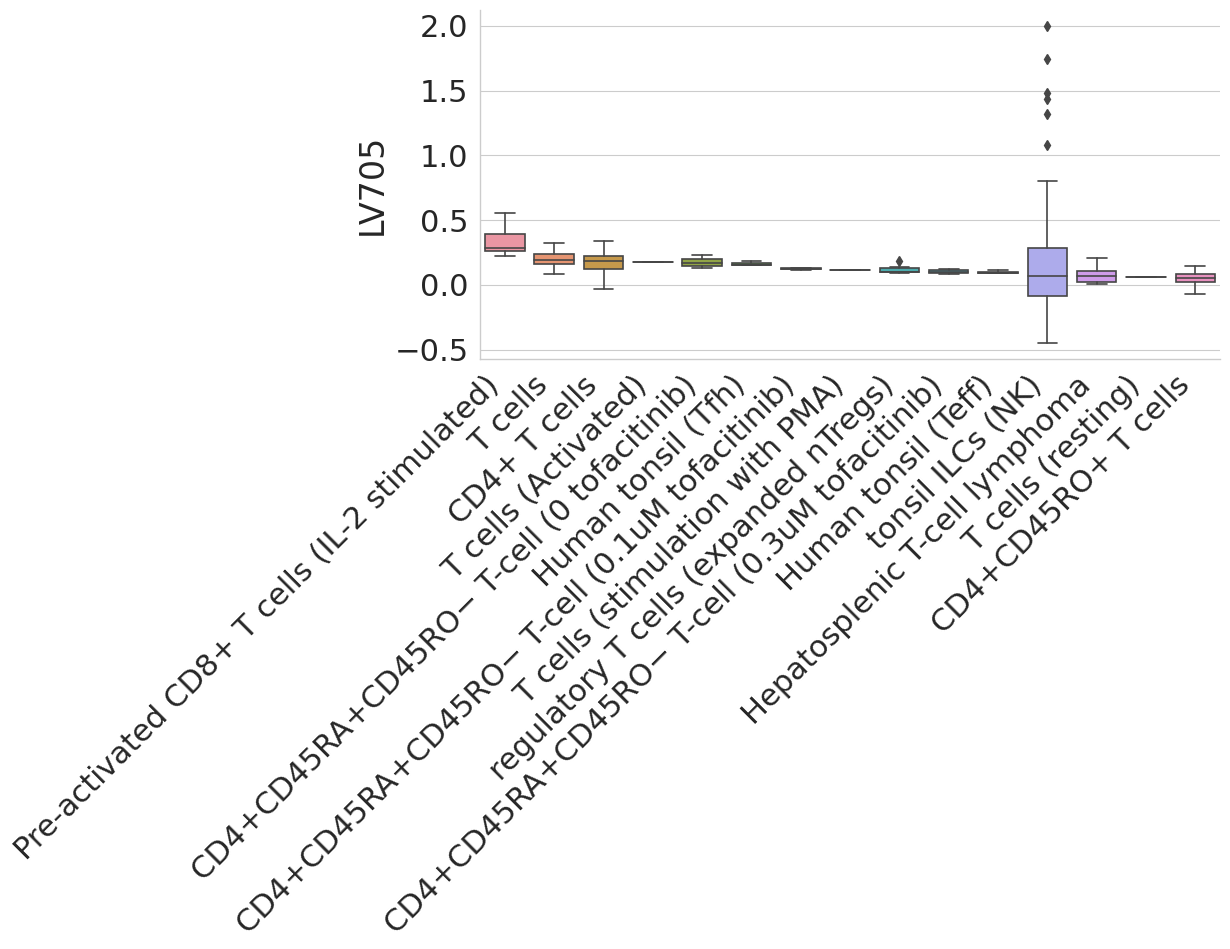

In [63]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=reduced_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    plt.savefig(
        OUTPUT_CELL_TYPE_FILEPATH,
        bbox_inches="tight",
        facecolor="white",
    )